In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   
5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
8   8  Excerpts From a Draft Script for Donald Trump’...   
9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                           NaN   
7               Alissa J. Rubin   
8                           NaN   
9  Megan Twohey and Scott Shane   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
5  In these trying times, Jackie Mason is the Voi...      0  
6  Ever wonder how Britain’s most iconic pop pian...      1  
7  PARIS  —   France chose an idealistic, traditi...      0  
8  Donald J. Trump is scheduled to make a highly ...      0  
9  A week before Michael T. Flynn resigned as nat...      0

In [3]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [4]:
df = df.drop('author', axis=1)

df.head()

id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

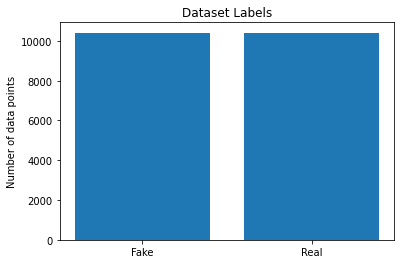

1    10413
0    10387
Name: label, dtype: int64


In [5]:
from matplotlib import pyplot as plt

xs = [i for i in range(0,2)]

plt.bar(xs, df.label.value_counts())
plt.ylabel('Number of data points')
plt.title('Dataset Labels')
plt.xticks([0.0, 1.0], ['Fake', 'Real'])
plt.show()

print(df.label.value_counts())


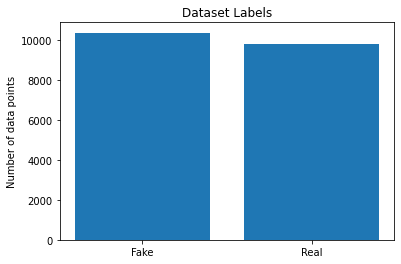

0    10387
1     9816
Name: label, dtype: int64

In [6]:

df = df.dropna()
messages = df.copy()
messages.reset_index(inplace=True)

from matplotlib import pyplot as plt

xs = [i for i in range(0,2)]

plt.bar(xs, messages.label.value_counts())
plt.ylabel('Number of data points')
plt.title('Dataset Labels')
plt.xticks([0.0, 1.0], ['Fake', 'Real'])
plt.show()
messages.label.value_counts()

<h2>PreProcessing</h2>

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [8]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

def preProcess(news_title):
       corpus = []
       for i in range(0, len(news_title)):
              review = re.sub('[^a-zA-Z]', ' ', news_title[i])
              review = review.lower()
              review = review.split()

              review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
              review = ' '.join(review)
              corpus.append(review)
       return corpus
   

In [9]:
titles = preProcess(list(messages['title']))
labels = messages['label']

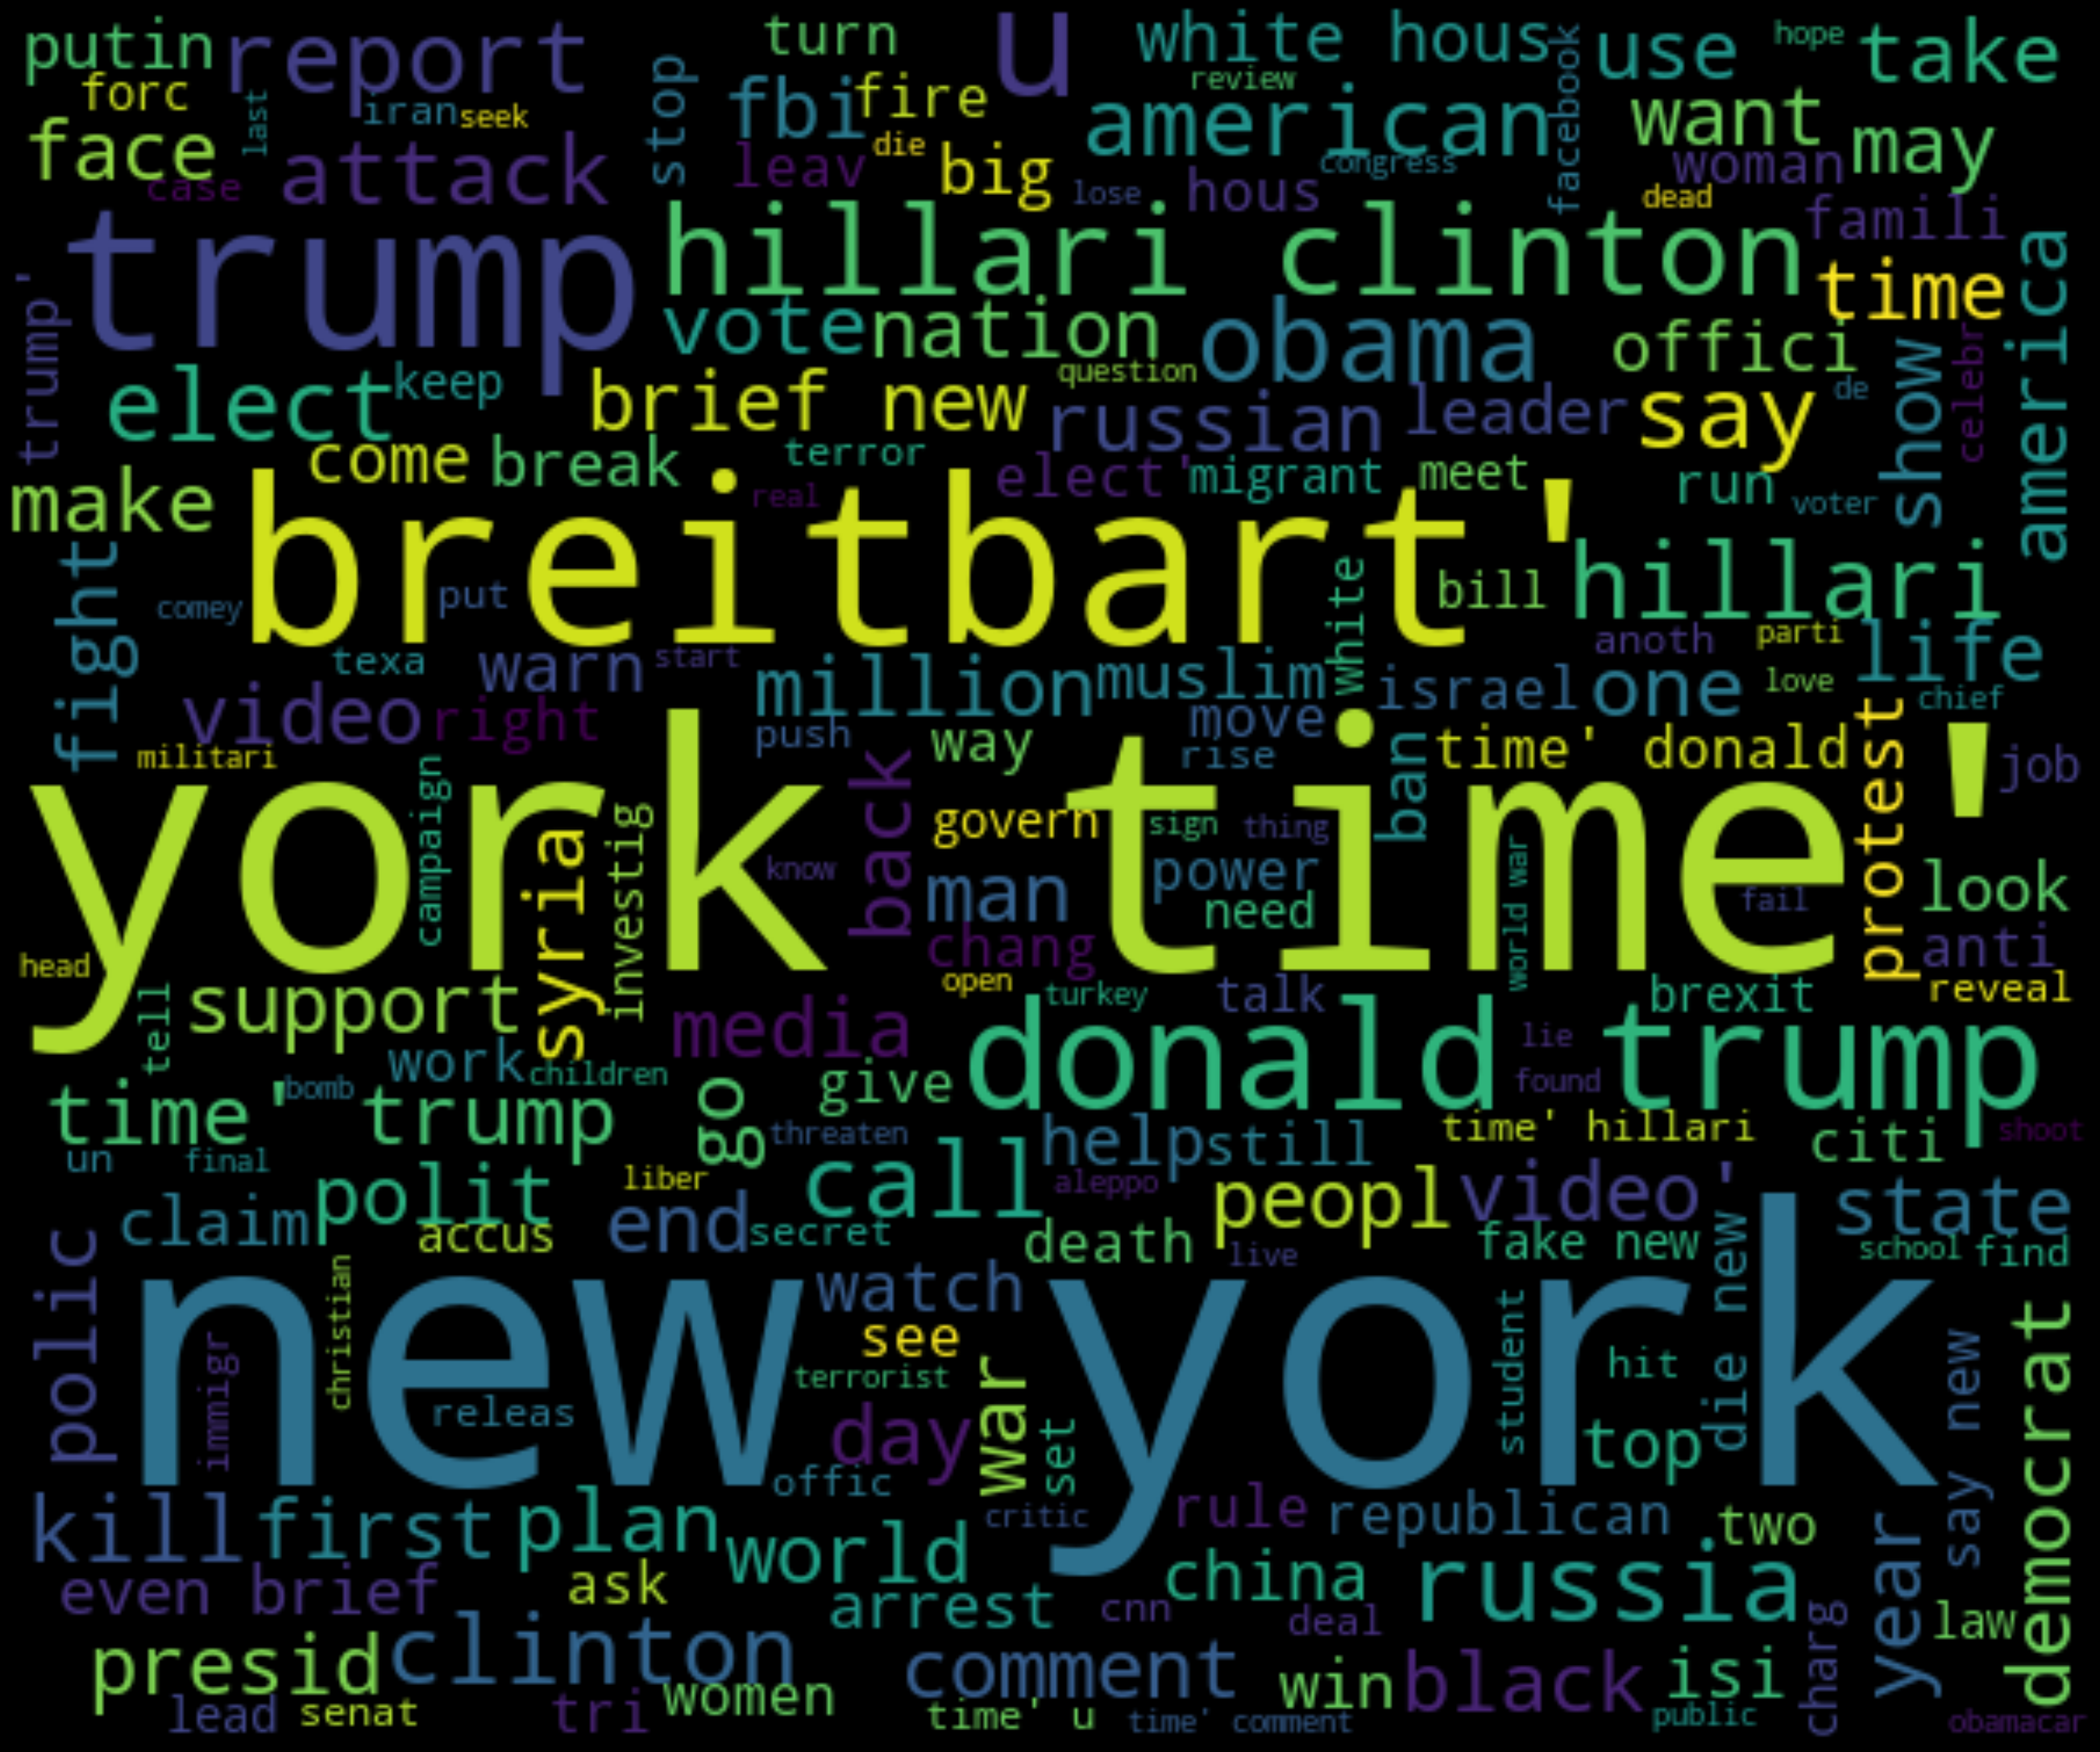

In [10]:
from wordcloud import WordCloud,STOPWORDS

text = titles
wordcloud = WordCloud(
    width = 600,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h2>Bag of words and TF/IDF</h2>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [12]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X_naive = cv.fit_transform(titles).toarray()
Y_naive = labels

In [13]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [14]:
X_naive_train, X_naive_test, y_naive_train, y_naive_test = train_test_split(X_naive, Y_naive, test_size=0.33, random_state=0)

In [16]:
model_naive = MultinomialNB()

In [17]:
model_naive.fit(X_naive_train, y_naive_train)
y_naive_pred = model_naive.predict(X_naive_test)

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
0.9148471615720524
0.904154792260387


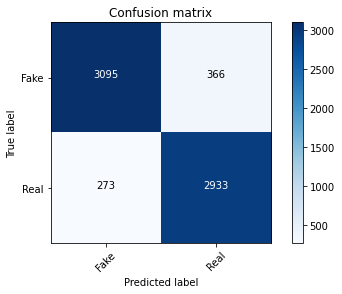

In [19]:
c_matix = confusion_matrix(y_naive_test, y_naive_pred)
plot_confusion_matrix(c_matix, classes=['Fake', 'Real'])
accuracy = accuracy_score(y_naive_test, y_naive_pred)
recall = recall_score(y_naive_test, y_naive_pred)
print(recall)
print(accuracy)

In [22]:
max_accuracy = 0
for alpha in np.arange(0, 1, 0.1):
       sub_classifier = MultinomialNB(alpha=alpha)
       sub_classifier.fit(X_naive_train, y_naive_train)
       y_naive_pred = sub_classifier.predict(X_naive_test)
       accuracy = accuracy_score(y_naive_test, y_naive_pred)
       if accuracy>max_accuracy:
              max_accuracy=accuracy
              classifier = sub_classifier
       print("Alpha: {}, Accuracy: {}".format(alpha, accuracy))

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Accuracy: 0.896055197240138
Alpha: 0.1, Accuracy: 0.9055047247637618
Alpha: 0.2, Accuracy: 0.9043047847607619
Alpha: 0.30000000000000004, Accuracy: 0.9046047697615119
Alpha: 0.4, Accuracy: 0.903254837258137
Alpha: 0.5, Accuracy: 0.904154792260387
Alpha: 0.6000000000000001, Accuracy: 0.9043047847607619
Alpha: 0.7000000000000001, Accuracy: 0.904154792260387
Alpha: 0.8, Accuracy: 0.9043047847607619
Alpha: 0.9, Accuracy: 0.9047547622618869


<h2>RNN and LSTM</h2>

In [24]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [25]:
def embed_features(t, sen_len, vocal_size):
       onehot_repr = [one_hot(sen, vocal_size) for sen in t]
       embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sen_len)
       print(embedded_docs)
       return embedded_docs


In [26]:
voc_size = 5000
s_len = 20
embedded_docs = embed_features(titles, vocal_size=voc_size, sen_len=s_len)

[[   0    0    0 ... 1771 2005 4852]
 [   0    0    0 ... 4890  280 4725]
 [   0    0    0 ... 2542 2727 2277]
 ...
 [   0    0    0 ... 3502 2553 1636]
 [   0    0    0 ... 3826 1953 2145]
 [   0    0    0 ... 2477 3314 1201]]


In [27]:
X_lstm = np.array(embedded_docs)
Y_lstm = np.array(labels)

In [28]:
#Creating the model
embedded_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedded_vector_features, input_length=s_len))
model.add(Dropout(0.3))
model.add((LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
#Spliting the data into training and testing data
X_lstm_train, X_lstm_test, Y_lstm_train, Y_lstm_test = train_test_split(X_lstm, Y_lstm, test_size=0.20, random_state=42)

In [59]:
#fitting the model
history = model.fit(X_lstm_train, Y_lstm_train, validation_data=(X_lstm_test, Y_lstm_test), epochs=10, batch_size=64)

Epoch 1/10
253/253 [==============================] - 8s 31ms/step - loss: 0.0714 - accuracy: 0.9824 - val_loss: 0.2744 - val_accuracy: 0.9188
Epoch 2/10
253/253 [==============================] - 10s 38ms/step - loss: 0.0391 - accuracy: 0.9903 - val_loss: 0.2709 - val_accuracy: 0.9218
Epoch 3/10
253/253 [==============================] - 10s 38ms/step - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.3303 - val_accuracy: 0.9191
Epoch 4/10
253/253 [==============================] - 10s 38ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.3462 - val_accuracy: 0.9191
Epoch 5/10
253/253 [==============================] - 10s 38ms/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.4066 - val_accuracy: 0.9211
Epoch 6/10
253/253 [==============================] - 10s 39ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.4045 - val_accuracy: 0.9191
Epoch 7/10
253/253 [==============================] - 10s 38ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.4119 - val_accuracy: 

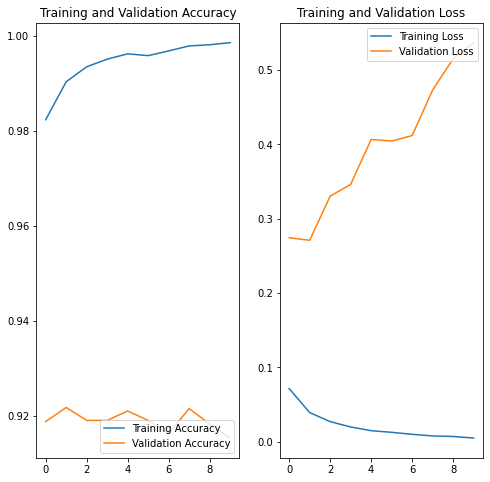

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [93]:
model.save("model_h1.h5")

In [63]:
print(X_lstm_test)

[[   0    0    0 ... 2379 4116 2744]
 [   0    0    0 ... 2305 2059 1191]
 [   0    0    0 ... 2223 4469  990]
 ...
 [   0    0    0 ... 3488 1020 2796]
 [   0    0    0 ...  110 2768 3385]
 [   0    0    0 ... 3502 2553 1636]]


In [64]:
Y_lstm_predict = model.predict_classes(X_lstm_test)

Confusion matrix, without normalization
[[1919  170]
 [ 172 1780]]
0.9047547622618869


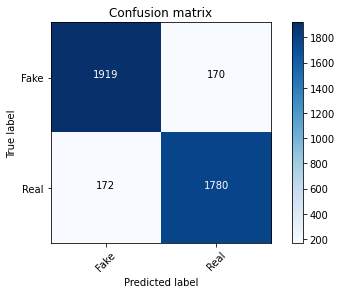

In [65]:
c_matix = confusion_matrix(Y_lstm_test, Y_lstm_predict)
plot_confusion_matrix(c_matix, classes=['Fake', 'Real'])
accuracy = accuracy_score(y_naive_test, y_naive_pred)
print(c_matix)
print(accuracy)

In [153]:
data_test_input = pd.read_csv('test.csv')
data_test_input.head(10)

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   
5  20805  Trump is USA's antique hero. Clinton will be n...   
6  20806  Pelosi Calls for FBI Investigation to Find Out...   
7  20807            Weekly Featured Profile – Randy Shannon   
8  20808  Urban Population Booms Will Make Climate Chang...   
9  20809                                                NaN   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
5                      NaN  Trump is USA's antique hero. Clinton will be n...  
6                  Pam Key  Sunday on NBC’s “Meet the Press,” House Minori...  
7            Trevor Loudon  You are here: Home / *Articles of the Bound* /...  
8                      NaN  Urban Population Booms Will Make Climate Chang...  
9      cognitive dissident                         don't we have the receipt?

In [154]:
data_test_output = pd.read_csv('submit.csv')
data_test_output.head(10)

id  label
0  20800      0
1  20801      1
2  20802      0
3  20803      1
4  20804      1
5  20805      1
6  20806      1
7  20807      1
8  20808      0
9  20809      1

In [155]:
data_test = pd.concat([data_test_input, data_test_output], axis=1, join='inner')
data_test.head(10)

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   
5  20805  Trump is USA's antique hero. Clinton will be n...   
6  20806  Pelosi Calls for FBI Investigation to Find Out...   
7  20807            Weekly Featured Profile – Randy Shannon   
8  20808  Urban Population Booms Will Make Climate Chang...   
9  20809                                                NaN   

                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                      NaN  Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   
5                      NaN  Trump is USA's antique hero. Clinton will be n...   
6                  Pam Key  Sunday on NBC’s “Meet the Press,” House Minori...   
7            Trevor Loudon  You are here: Home / *Articles of the Bound* /...   
8                      NaN  Urban Population Booms Will Make Climate Chang...   
9      cognitive dissident                         don't we have the receipt?   

      id  label  
0  20800      0  
1  20801      1  
2  20802      0  
3  20803      1  
4  20804      1  
5  20805      1  
6  20806      1  
7  20807      1  
8  20808      0  
9  20809      1

In [156]:
data_test.isna().sum()

id          0
title     122
author    503
text        7
id          0
label       0
dtype: int64

In [157]:
data_test = data_test.dropna()

X_test = list(data_test['title'])
Y_test = list(data_test['label'])


In [158]:
print(X_test[0:10])
print(Y_test[0:10])

['Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times', '#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police', 'Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times', 'Keiser Report: Meme Wars (E995)', 'Pelosi Calls for FBI Investigation to Find Out ’What the Russians Have on Donald Trump’ - Breitbart', 'Weekly Featured Profile – Randy Shannon', '184 U.S. generals and admirals endorse Trump for Commander-In-Chief', '“Working Class Hero” by John Brennon', 'The Rise of Mandatory Vaccinations Means the End of Medical Freedom', 'Communists Terrorize Small Business']
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1]


In [159]:
X_test = preProcess(X_test)

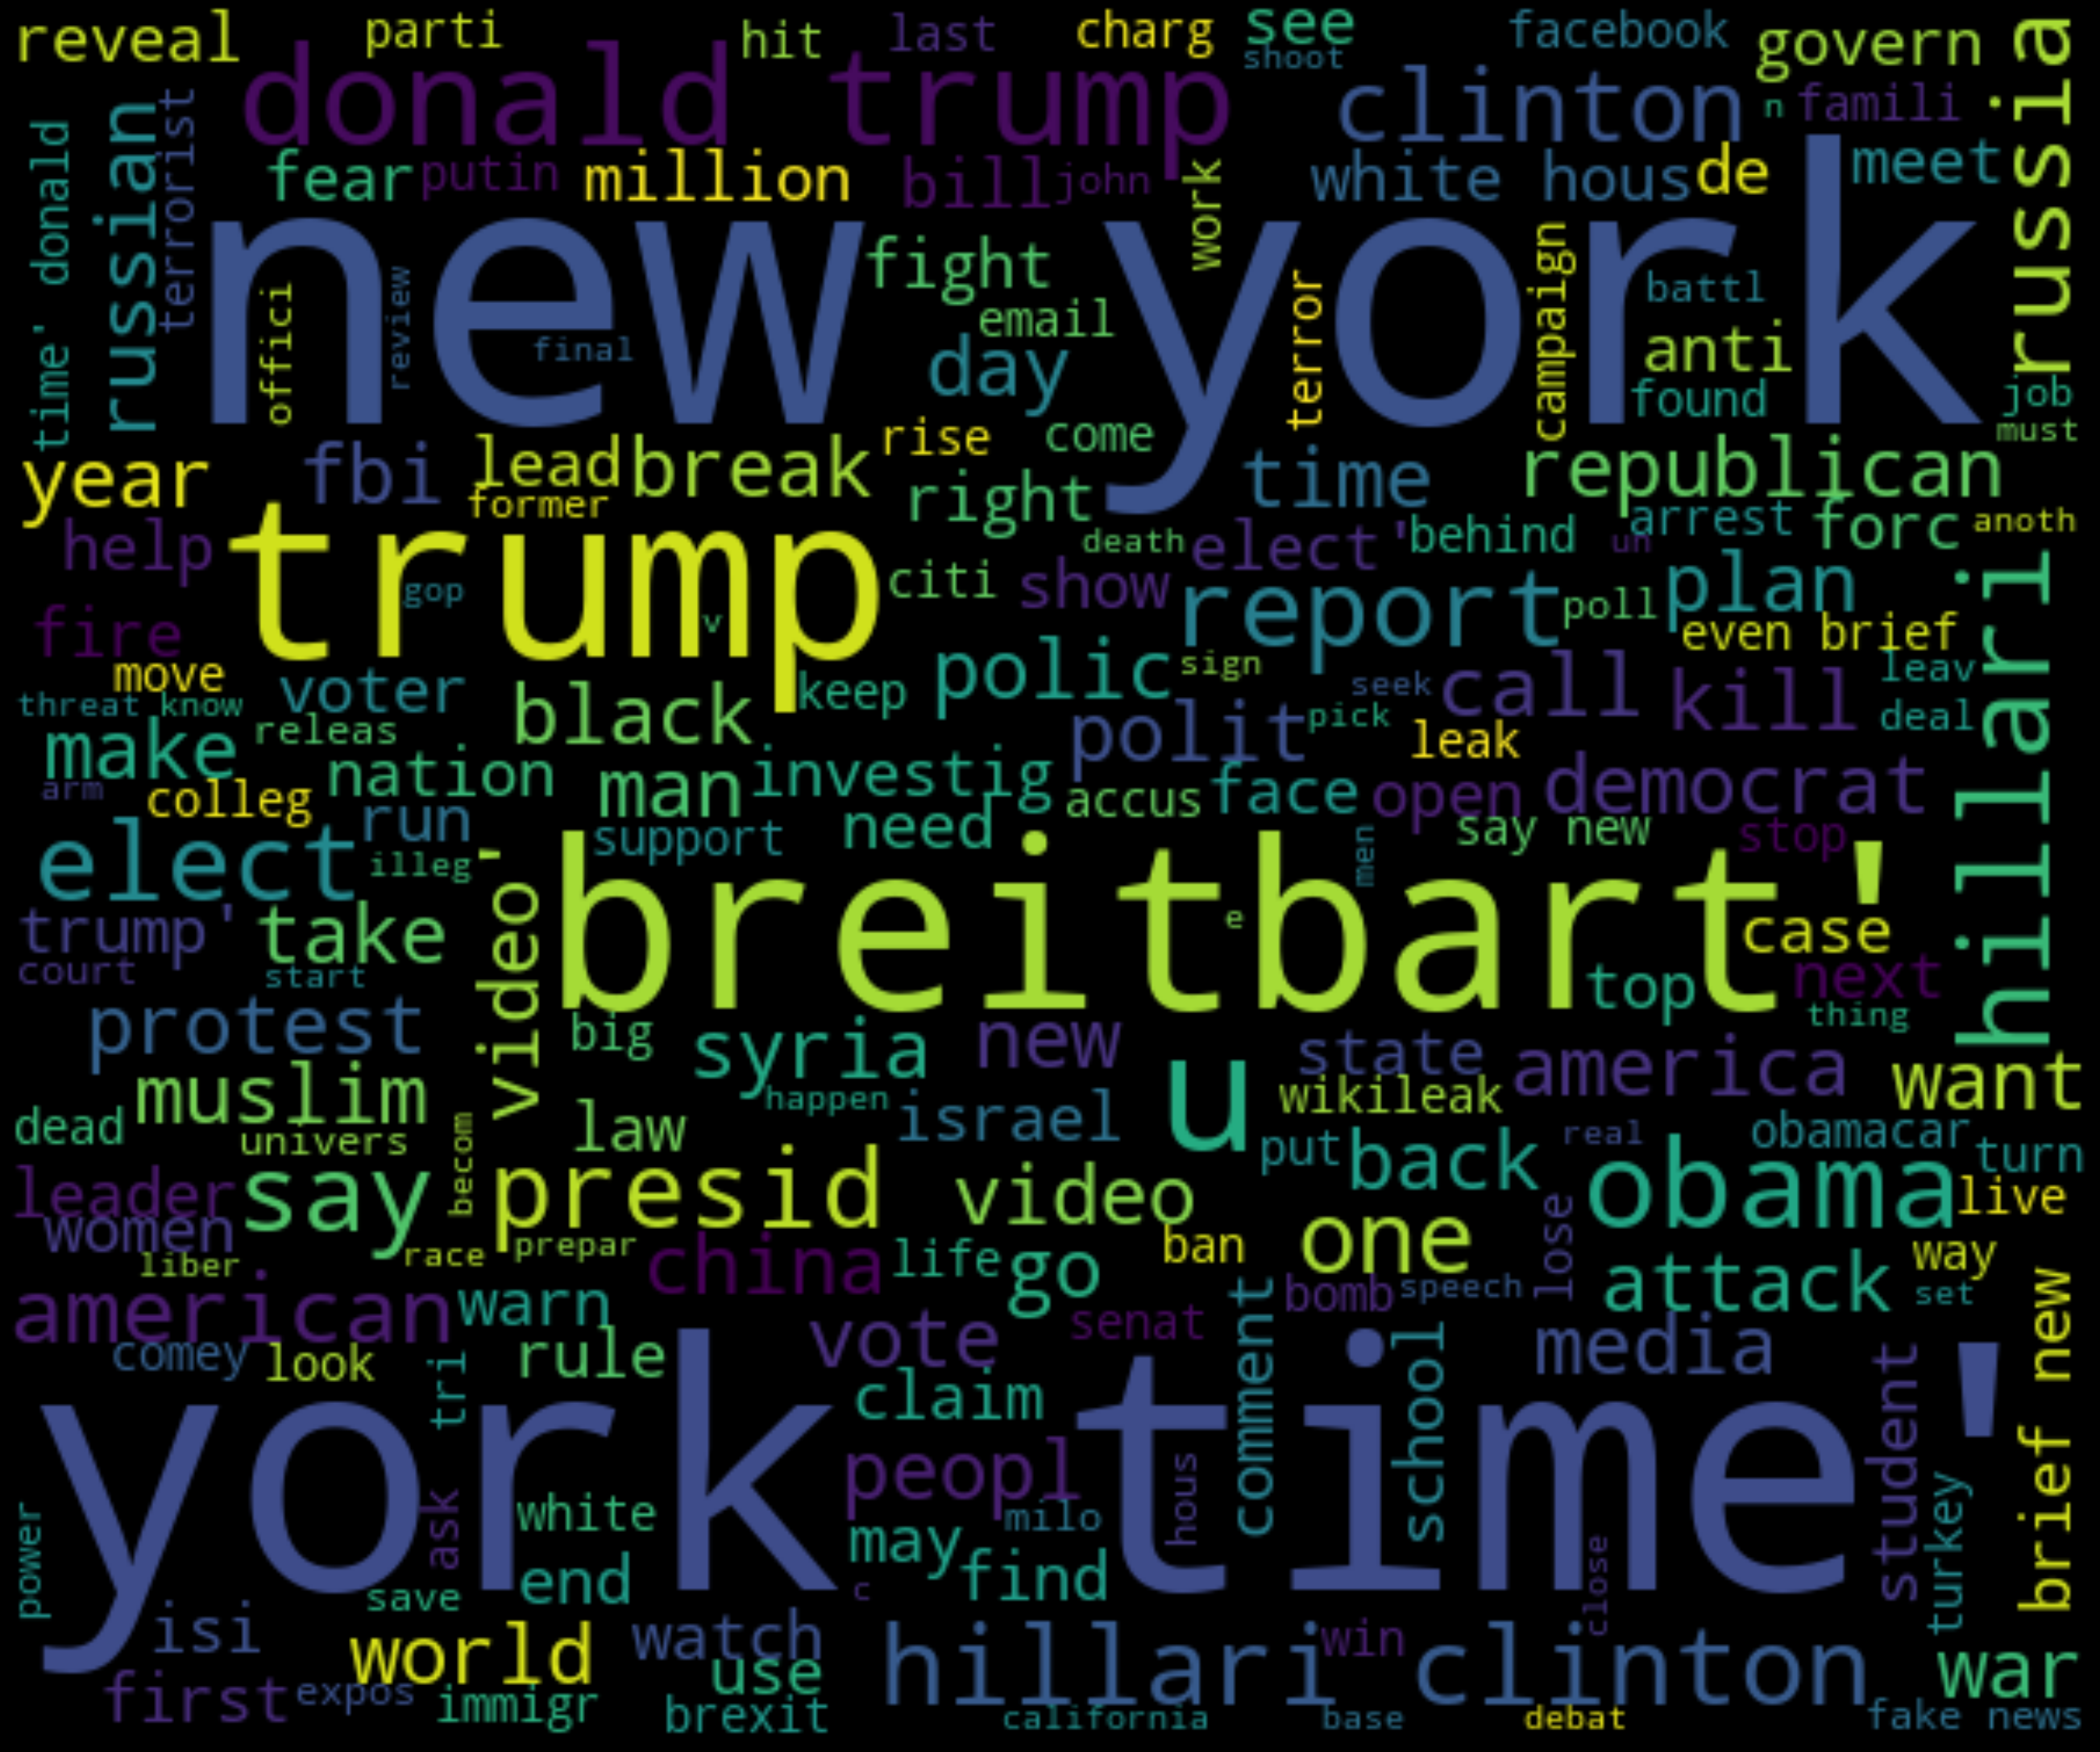

In [160]:
from wordcloud import WordCloud,STOPWORDS

text = X_test
wordcloud = WordCloud(
    width = 600,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [161]:
X = embed_features(X_test, 20, 5000)
print(len(X))
print(len(Y_test))

[[   0    0    0 ... 1011 1763 3652]
 [   0    0    0 ... 1768 3428 4441]
 [   0    0    0 ... 1011 1763 3652]
 ...
 [   0    0    0 ... 1011 1763 3652]
 [   0    0    0 ... 1011 1763 3652]
 [   0    0    0 ... 1011 1763 3652]]
4575
4575


In [162]:
X = np.array(X)
Y_test = np.array(Y_test)

In [163]:
Y_predict = model.predict_classes(X)

print(len(X))
print(len(Y_test))

4575
4575


In [164]:
c_matix = confusion_matrix(Y_test, Y_predict)
accuracy = accuracy_score(Y_test, Y_predict)
print(c_matix)
print(accuracy)

[[1548  665]
 [1031 1331]]
0.6292896174863388
